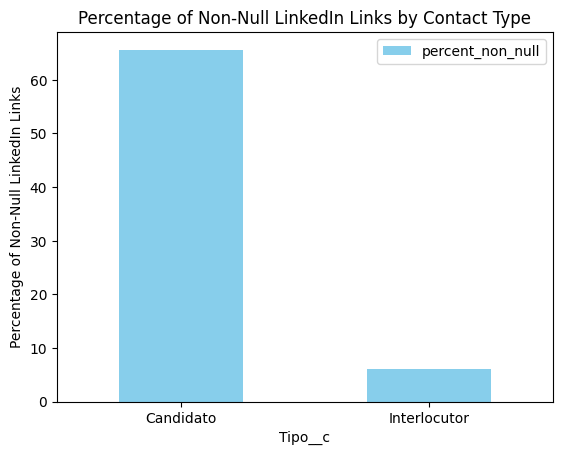

In [4]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')

# Create the database connection string
connection_string = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = sqlalchemy.create_engine(connection_string)

# Query to get all records
query = """
SELECT *
FROM iris."Contact";
"""

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, con=engine)

# Filter the data in Python
df_filtered = df[df["Tipo__c"].isin(['Candidato', 'Interlocutor'])].copy()

# Perform data analysis in Python
df_filtered.loc[:, 'LinkedInLink__c'] = df_filtered['LinkedInLink__c'].apply(lambda x: bool(x) and x.strip() != '')

summary = df_filtered.groupby('Tipo__c')['LinkedInLink__c'].agg(['count', 'sum']).reset_index()
summary.columns = ['Tipo__c', 'total', 'non_null']
summary['percent_non_null'] = (summary['non_null'] / summary['total']) * 100

# Plot the data
fig, ax = plt.subplots()
summary.plot(kind='bar', x='Tipo__c', y='percent_non_null', ax=ax, color='skyblue')
ax.set_ylabel('Percentage of Non-Null LinkedIn Links')
ax.set_title('Percentage of Non-Null LinkedIn Links by Contact Type')
plt.xticks(rotation=0)
plt.show()